<a href="https://colab.research.google.com/github/animeesh/Fashion_mnist/blob/master/callback_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

basic tf case 

In [2]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

In [5]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 451ms/step - loss: 41.6961
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 32.8075
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 25.8144
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 20.3124
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 15.9837
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 12.5780
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 9.8985
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 7.7903
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 6.1317
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 4.8267
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 3.7999
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 2.9921
Epoch 13/500
1/1 [==============================] - 

In [6]:
print(model.predict([10.0]))

[[31.002066]]


 new module computervison on 
[link text](https://)tf

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


3
[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179
  186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152
  148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140
  137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131
  131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119
  140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117
  127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119
  127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 

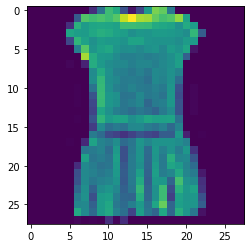

In [6]:
import matplotlib.pyplot as plt
plt.imshow(training_images[3])
print(training_labels[3])
print(training_images[3])

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [17]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


ValueError: ignored

In [15]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8798


[0.3412950038909912, 0.879800021648407]

In [16]:
classifications = model.predict(test_images)
print(classifications[0])

[5.4902584e-06 7.2175652e-08 7.5568165e-09 2.0286512e-09 9.5346900e-07
 4.2572333e-03 7.7751702e-07 1.0568069e-01 2.2892696e-06 8.9005244e-01]


In [21]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5860 - accuracy: 0.7935
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3660 - accuracy: 0.8658

Reached 85% accuracy so cancelling training!
